In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
import pprint

# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from splinter import Browser
from selenium.webdriver.chrome.service import Service

service = Service(executable_path=r'C:\Users\User\Downloads\chromedriver_win32\chromedriver.exe')
browser = Browser('chrome', service=service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
url = "r'C:\Users\User\Downloads\chromedriver_win32\chromedriver.exe"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Get the HTML content from the current page
html_content = browser.html

# Create a BeautifulSoup object
soup = BeautifulSoup(html_content, 'html.parser')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Find the table element
table = soup.find('table')

# Find all header cells within the table
header_cells = table.find_all('th')

# Extract the header names from the header cells
column_names = []
for cell in header_cells:
    cell = cell.get_text()
    column_names.append(cell)
    
print(f"Column Names: {column_names}")

Column Names: ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [8]:
# Create an empty list to store the rows
rows = []

# Find all data rows within the table
data_rows = table.find_all('tr', class_='data-row')

# Loop through the scraped data to create a list of rows
for row in data_rows:
    # Find all cells within each row
    cells = row.find_all('td')
    
    # Extract the cell values
    row_data = [cell.get_text() for cell in cells]
    
    # Append the row data to the list of rows
    rows.append(row_data)
    
# Display the rows data
pprint.pprint(rows)

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [11]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(rows, columns=column_names)

In [12]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [13]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [14]:
# Change data types for data analysis

# Convert 'terrestrial_date' column to datetime64[ns] data type
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'sol', 'ls', 'month' column to int64 data type
df['sol'] = df['sol'].astype('int64')
df['ls'] = df['ls'].astype('int64')
df['month'] = df['month'].astype('int64')

# Convert 'min_temp', 'pressure' column to float64 data type
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [15]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
# 1. How many months are there on Mars?
df['month'].value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [17]:
# 2. How many Martian days' worth of data are there?
df['sol'].nunique()

1867

In [18]:
# 3. What is the average low temperature by month?
df.groupby('month')['min_temp'].mean()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

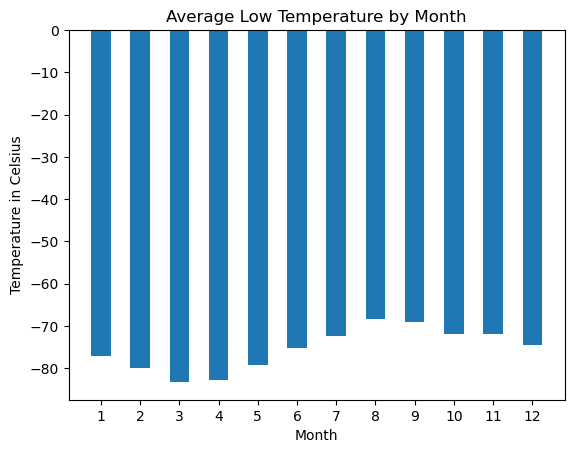

In [19]:
# Plot the average temperature by month

avg_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Set the width of the bars
bar_width = 0.5

# Create a bar chart
plt.bar(range(1, 13), avg_low_temp_by_month.values, width=bar_width)

# Set the labels for x-axis and y-axis
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')

# Set the title of the plot
plt.title('Average Low Temperature by Month')

# Set the x-tick labels to display 1 to 12
plt.xticks(range(1, 13), range(1, 13))

# Display the plot
plt.show()

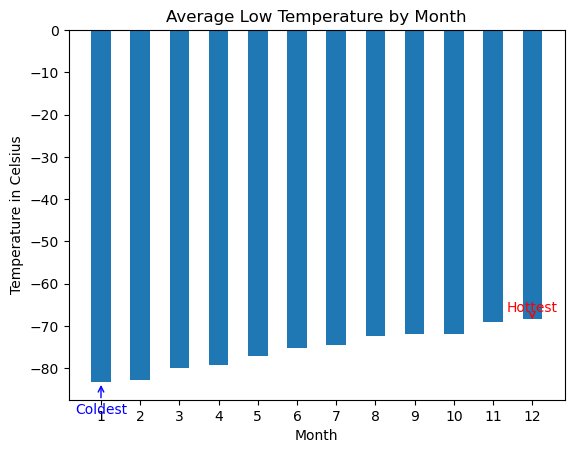

In [20]:
# Identify the coldest and hottest months in Curiosity's location

avg_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Sort the DataFrame by the average low temperature in ascending order
sorted_df = avg_low_temp_by_month.sort_values()

# Set the width of the bars
bar_width = 0.5

# Create a bar chart with the sorted DataFrame
plt.bar(range(1, 13), sorted_df.values, width=bar_width)

# Set the labels for x-axis and y-axis
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')

# Set the title of the plot
plt.title('Average Low Temperature by Month')

# Identify the coldest and hottest months
coldest_month = sorted_df.idxmin()
hottest_month = sorted_df.idxmax()

# Create a dictionary to map the original month numbers to the re-arranged numbers
month_mapping = {month_num: i+1 for i, month_num in enumerate(sorted_df.index)}

# Add annotations for coldest and hottest months
plt.annotate(
    'Coldest',
    xy=(month_mapping[coldest_month], sorted_df[coldest_month]),
    xytext=(month_mapping[coldest_month], sorted_df[coldest_month] - 5),
    ha='center',
    va='top',
    color='blue',
    arrowprops=dict(arrowstyle='->', color='blue')
)
plt.annotate(
    'Hottest',
    xy=(month_mapping[hottest_month], sorted_df[hottest_month]),
    xytext=(month_mapping[hottest_month], sorted_df[hottest_month] + 1),
    ha='center',
    va='bottom',
    color='red',
    arrowprops=dict(arrowstyle='->', color='red')
)

# Set the x-axis ticks to the re-arranged month numbers
plt.xticks(range(1, 13), [month_mapping[month_num] for month_num in sorted_df.index])

# Display the plot
plt.show()

In [21]:
# 4. Average pressure by Martian month
df.groupby('month')['pressure'].mean()

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

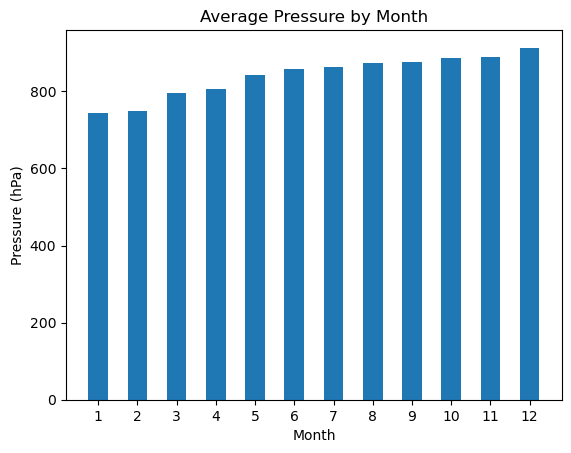

In [22]:
# Plot the average pressure by month

# Calculate the average pressure by month
avg_pressure_by_month = df.groupby('month')['pressure'].mean().sort_values()

# Set the width of the bars
bar_width = 0.5

# Create a bar chart with the average pressure data
plt.bar(range(1, 13), avg_pressure_by_month, width=bar_width)

# Set the labels for x-axis and y-axis
plt.xlabel('Month')
plt.ylabel('Pressure (hPa)')

# Set the title of the plot
plt.title('Average Pressure by Month')

# Set the x-tick labels to display month numbers from 1 to 12
plt.xticks(range(1, 13))

# Display the plot
plt.show()

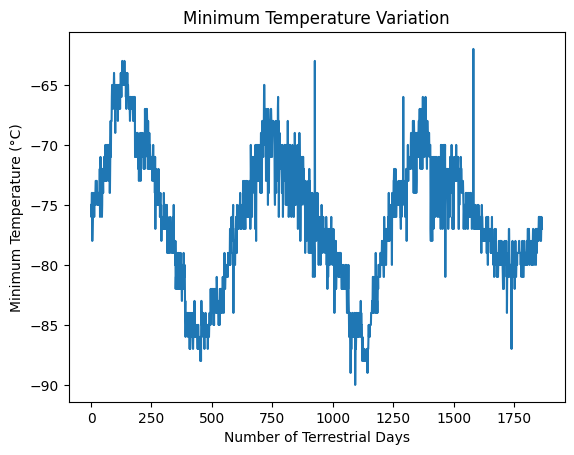

In [41]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Get the number of terrestrial days
num_terrestrial_days = range(0, len(df))

# Set the x-axis and y-axis values
x_values = num_terrestrial_days
y_values = df['min_temp']

# Create a line chart with the x-axis as the number of terrestrial days and y-axis as the minimum temperature
plt.plot(x_values, y_values)

# Set the labels for x-axis and y-axis
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')

# Set the title of the plot
plt.title('Minimum Temperature Variation')

# Set the x-tick labels to display at intervals of 250 terrestrial days
plt.xticks(range(0, len(df), 250))

# Display the plot
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV file
df.to_csv('temperature_data.csv', index=False)

In [24]:
browser.quit()